<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/time-series/WeatherData(TimeSeries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import calendar

from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/daily-min-temperatures.csv', header=0, parse_dates=[0])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


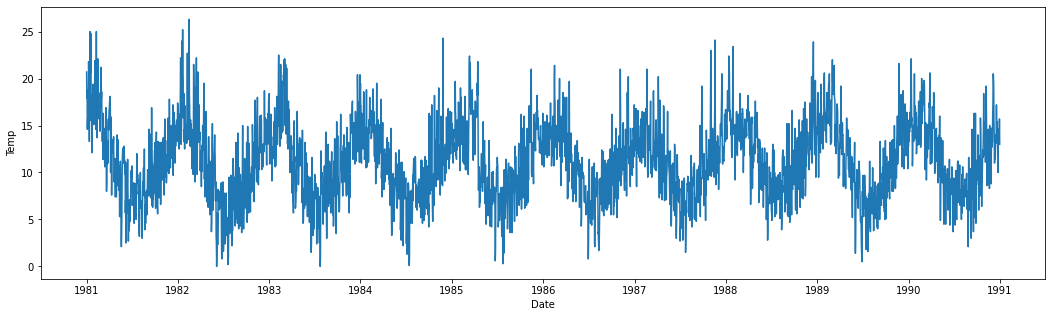

In [62]:
plt.figure(figsize=(18,5))
sns.lineplot(x=df['Date'], y=df['Temp'])

In [63]:
df['lag1'] = df['Temp'].shift(1)
df['Temp_diff_1'] = df['Temp'].diff(periods=1)
df.head()

,Date,Temp,lag1,Temp_diff_1
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


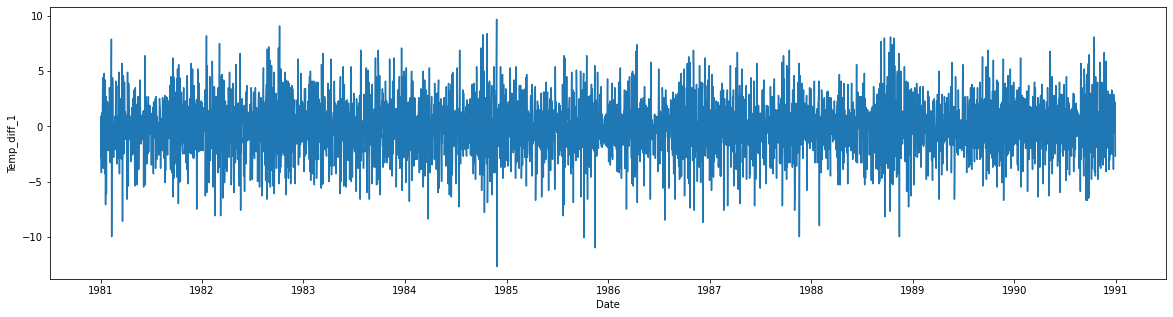

In [77]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df['Date'], y=df['Temp_diff_1'])

In [65]:
df.head()

,Date,Temp,lag1,Temp_diff_1
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [66]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthInText'] = df['Month'].apply(lambda x: look_up[x])
plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [78]:
df.head()

,Date,Temp,lag1,Temp_diff_1,Year,Month,MonthInText
0,1981-01-01,20.7,NaN,NaN,1981,1,Jan
1,1981-01-02,17.9,20.7,-2.8,1981,1,Jan
2,1981-01-03,18.8,17.9,0.9,1981,1,Jan
3,1981-01-04,14.6,18.8,-4.2,1981,1,Jan
4,1981-01-05,15.8,14.6,1.2,1981,1,Jan


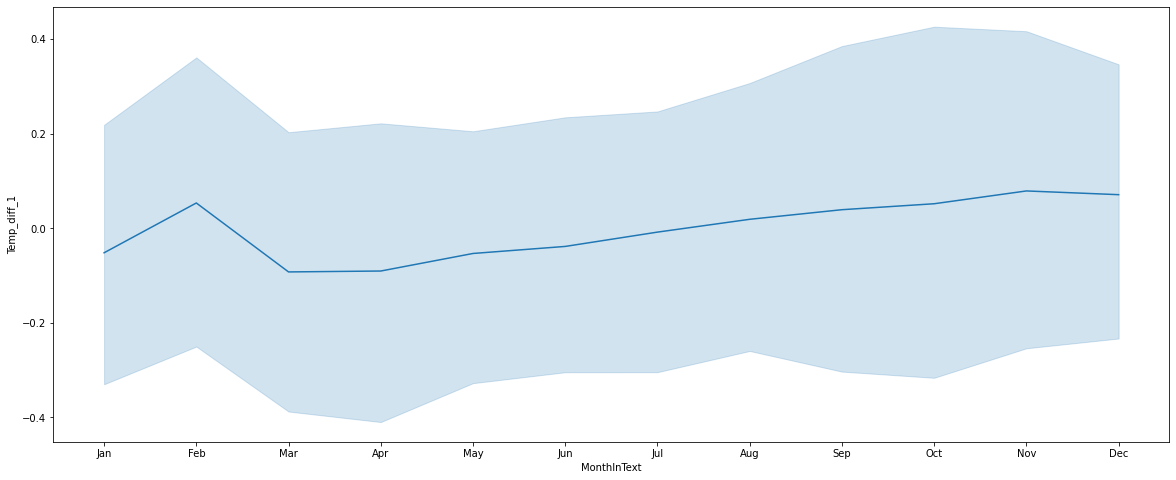

In [67]:
# Mean temperature in every month

plt.figure(figsize=(20,8))
sns.lineplot(x=df['MonthInText'], y=df['Temp_diff_1'])


In [68]:
df.groupby('MonthInText')['Temp_diff_1'].mean()

MonthInText
Apr   -0.090333
Aug    0.019032
Dec    0.071104
Feb    0.053546
Jan   -0.051780
Jul   -0.008065
Jun   -0.038333
Mar   -0.092258
May   -0.053226
Nov    0.079000
Oct    0.051935
Sep    0.039333
Name: Temp_diff_1, dtype: float64

In [69]:
df.groupby('Month')['Temp_diff_1'].mean()

Month
1    -0.051780
2     0.053546
3    -0.092258
4    -0.090333
5    -0.053226
6    -0.038333
7    -0.008065
8     0.019032
9     0.039333
10    0.051935
11    0.079000
12    0.071104
Name: Temp_diff_1, dtype: float64

In [84]:
# Mean temperature in from 1981-1990

df.groupby('Year')['Temp'].mean()


Year
1981    11.517260
1982    10.783562
1983    11.187397
1984    10.591781
1985    11.137534
1986    10.803288
1987    10.853151
1988    11.972055
1989    11.261918
1990    11.669589
Name: Temp, dtype: float64

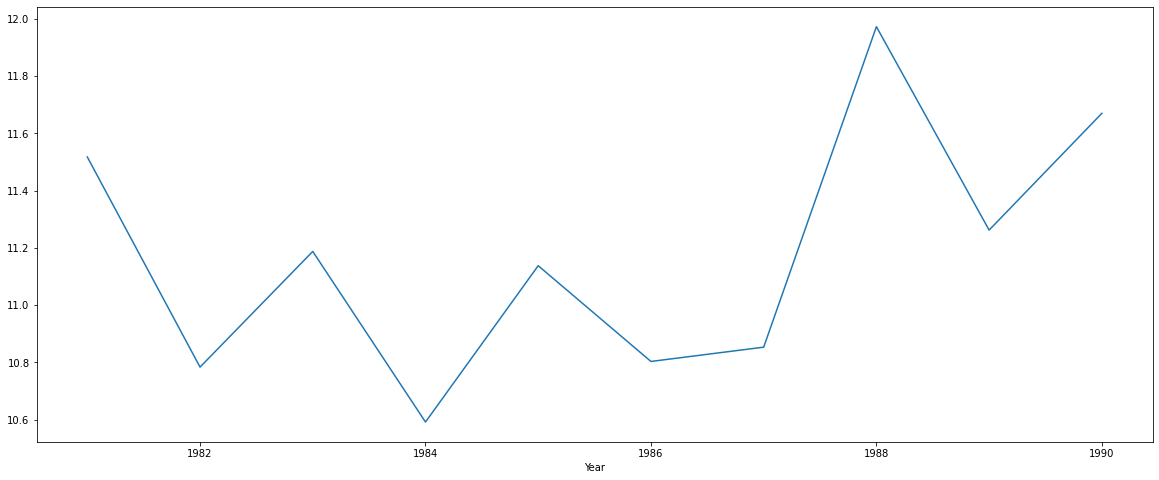

In [85]:
plt.figure(figsize=(20,8))
df.groupby('Year')['Temp'].mean().plot()

In [70]:
# TRAIN TEST SPLIT 

df.shape

(3650, 7)

In [71]:
df.shape[0]

3650

In [72]:
train_size = int(df.shape[0]*0.8)
train_size

2920

In [73]:
train = df[0:train_size]
test = df[train_size:]

In [74]:
train.shape

(2920, 7)

In [75]:
test.shape

(730, 7)